# Process the Downloaded DWD Time Series with Pandas

## 1. Development of procedure

1. List the directory with the downloaded time series data (zip archives)
1. unzip the first archive and look at the data
1. Open the html meta data file in chrome and let it be translated.
1. Load the TS data into Pandas.


### Local Directory Storing the Downloaded FTP Archives

In [2]:
# This is the directory with the downloaded TS zip files.
# TS stands for "time series". Better add a trailing "/" to make life easier ... 

#localdir = "data/DWD/TS/" 
localdir = "data/DWD/annual/kl/historical/"

In [3]:
import os
filelist = []
filelist = os.listdir(localdir)
print()
print("** You should see a list also showing the zip files. **")
print()
print(filelist)


** You should see a list also showing the zip files. **

['.ipynb_checkpoints', 'jahreswerte_KL_01078_19400101_20191231_hist', 'jahreswerte_KL_01078_19400101_20191231_hist.zip', 'jahreswerte_KL_01300_19310101_20191231_hist', 'jahreswerte_KL_01300_19310101_20191231_hist.zip', 'jahreswerte_KL_01303_18880101_20191231_hist', 'jahreswerte_KL_01303_18880101_20191231_hist.zip', 'jahreswerte_KL_01327_19370101_20191231_hist', 'jahreswerte_KL_01327_19370101_20191231_hist.zip', 'jahreswerte_KL_01590_19370101_20191231_hist', 'jahreswerte_KL_01590_19370101_20191231_hist.zip', 'jahreswerte_KL_02110_19380101_20191231_hist', 'jahreswerte_KL_02110_19380101_20191231_hist.zip', 'jahreswerte_KL_02483_19290101_20191231_hist', 'jahreswerte_KL_02483_19290101_20191231_hist.zip', 'jahreswerte_KL_02497_19370101_20191231_hist', 'jahreswerte_KL_02497_19370101_20191231_hist.zip', 'jahreswerte_KL_02629_18510101_20191231_hist', 'jahreswerte_KL_02629_18510101_20191231_hist.zip', 'jahreswerte_KL_02968_19030101_201912

### Let us use pathlib to select the zip archives only

There are numerous ways to select files with extension ".zip" 

* https://stackoverflow.com/questions/5899497/how-can-i-check-the-extension-of-a-file

* https://docs.python.org/3/library/pathlib.html
* https://www.linuxjournal.com/content/easier-python-paths-pathlib

You can use the libs e.g.
* os, 
* glob, 
* pathlib,
* or others.


In [4]:
# There are many different ways to handle paths.
# Here we try pathlib. It is object oriented. 

import pathlib
p = pathlib.Path(localdir)

In [5]:
for elt in p.iterdir():
    print("elt:", elt)

elt: data\DWD\annual\kl\historical\.ipynb_checkpoints
elt: data\DWD\annual\kl\historical\jahreswerte_KL_01078_19400101_20191231_hist
elt: data\DWD\annual\kl\historical\jahreswerte_KL_01078_19400101_20191231_hist.zip
elt: data\DWD\annual\kl\historical\jahreswerte_KL_01300_19310101_20191231_hist
elt: data\DWD\annual\kl\historical\jahreswerte_KL_01300_19310101_20191231_hist.zip
elt: data\DWD\annual\kl\historical\jahreswerte_KL_01303_18880101_20191231_hist
elt: data\DWD\annual\kl\historical\jahreswerte_KL_01303_18880101_20191231_hist.zip
elt: data\DWD\annual\kl\historical\jahreswerte_KL_01327_19370101_20191231_hist
elt: data\DWD\annual\kl\historical\jahreswerte_KL_01327_19370101_20191231_hist.zip
elt: data\DWD\annual\kl\historical\jahreswerte_KL_01590_19370101_20191231_hist
elt: data\DWD\annual\kl\historical\jahreswerte_KL_01590_19370101_20191231_hist.zip
elt: data\DWD\annual\kl\historical\jahreswerte_KL_02110_19380101_20191231_hist
elt: data\DWD\annual\kl\historical\jahreswerte_KL_02110_1

In [8]:
print("elt        :", elt)
print("elt.parent :", elt.parent)
print("elt.stem   :", elt.stem)
print("elt.suffix :", elt.suffix)

elt        : data\DWD\annual\kl\historical\KL_Jahreswerte_Beschreibung_Stationen.txt
elt.parent : data\DWD\annual\kl\historical
elt.stem   : KL_Jahreswerte_Beschreibung_Stationen
elt.suffix : .txt


In [9]:
# create a list of all Path objects of the zip files
ziplist = [elt for elt in p.iterdir() if elt.suffix == ".zip"]
print("** You should see a list of Path objects pointing to the zip files, e.g. WindowsPath or PosixPath **")
print()
print(ziplist)

** You should see a list of Path objects pointing to the zip files, e.g. WindowsPath or PosixPath **

[WindowsPath('data/DWD/annual/kl/historical/jahreswerte_KL_01078_19400101_20191231_hist.zip'), WindowsPath('data/DWD/annual/kl/historical/jahreswerte_KL_01300_19310101_20191231_hist.zip'), WindowsPath('data/DWD/annual/kl/historical/jahreswerte_KL_01303_18880101_20191231_hist.zip'), WindowsPath('data/DWD/annual/kl/historical/jahreswerte_KL_01327_19370101_20191231_hist.zip'), WindowsPath('data/DWD/annual/kl/historical/jahreswerte_KL_01590_19370101_20191231_hist.zip'), WindowsPath('data/DWD/annual/kl/historical/jahreswerte_KL_02110_19380101_20191231_hist.zip'), WindowsPath('data/DWD/annual/kl/historical/jahreswerte_KL_02483_19290101_20191231_hist.zip'), WindowsPath('data/DWD/annual/kl/historical/jahreswerte_KL_02497_19370101_20191231_hist.zip'), WindowsPath('data/DWD/annual/kl/historical/jahreswerte_KL_02629_18510101_20191231_hist.zip'), WindowsPath('data/DWD/annual/kl/historical/jahreswe

#### EXTRACT ALL Files in the zip archives, UNZIP

In [12]:
# EXTRACT ALL Files in the zip archives, UNZIP
from zipfile import ZipFile

# time series directory list
TSdirlist = []

for elt in ziplist:
    unzipdir = str(elt.parent) + "\\" + elt.stem    
    ZipFile(elt).extractall(unzipdir)
    TSdirlist.append(unzipdir)

In [13]:
# list the names of the new directories 
for elt in TSdirlist: print(elt)

data\DWD\annual\kl\historical\jahreswerte_KL_01078_19400101_20191231_hist
data\DWD\annual\kl\historical\jahreswerte_KL_01300_19310101_20191231_hist
data\DWD\annual\kl\historical\jahreswerte_KL_01303_18880101_20191231_hist
data\DWD\annual\kl\historical\jahreswerte_KL_01327_19370101_20191231_hist
data\DWD\annual\kl\historical\jahreswerte_KL_01590_19370101_20191231_hist
data\DWD\annual\kl\historical\jahreswerte_KL_02110_19380101_20191231_hist
data\DWD\annual\kl\historical\jahreswerte_KL_02483_19290101_20191231_hist
data\DWD\annual\kl\historical\jahreswerte_KL_02497_19370101_20191231_hist
data\DWD\annual\kl\historical\jahreswerte_KL_02629_18510101_20191231_hist
data\DWD\annual\kl\historical\jahreswerte_KL_02968_19030101_20191231_hist
data\DWD\annual\kl\historical\jahreswerte_KL_04063_19500101_20191231_hist
data\DWD\annual\kl\historical\jahreswerte_KL_04371_19310101_20191231_hist
data\DWD\annual\kl\historical\jahreswerte_KL_05717_19310101_20191231_hist


In [ ]:
# List the files in one of the new unzipped directories
exampledir = TSdirlist[0]
p2 = pathlib.Path(exampledir)
for elt in p2.iterdir(): print(elt.name)

### Invesitgate one of the product files ("produkt_...txt") and import it with pd.read_csv

In [ ]:
fname = "produkt_klima_jahr_19400101_20191231_01078.txt"
fname

In [ ]:
fullfilename = exampledir + "/" + fname

In [ ]:
fullfilename

#### Use pd.read_csv to read the time series data

In [ ]:
import pandas as pd
df = pd.read_csv(fullfilename, sep = ";", parse_dates = ["MESS_DATUM_BEGINN", "MESS_DATUM_ENDE"], index_col = ["MESS_DATUM_BEGINN"])
df.head(10)

In [ ]:
#%matplotlib inline
import matplotlib.pyplot as plt 

In [ ]:
#help(s1)

In [ ]:
fig1, ax1 = plt.subplots(1,1,figsize=(8,6),dpi=136)
s1 = df["JA_TT"]
s1.plot(ax = ax1, style="-*")
ax1.grid(True)
ax1.set_ylim([0,13])
plt.show()

In [ ]:
# Data TYPES!
print("type(s1)           : ", type(s1))
print("type(s1.to_frame() : ", type(s1.to_frame()))

## 2. Extract only the needed product files and add them to Pandas.

1. How do you list elements in a zip arcive?
1. What is the name of the data file with the TS data?
1. How can you identify the file name from the list?
1. Open this file from the zip archive and use pd.csv_read() to read it into a data frame.

### **ANALYSE THE FOLLOWING CODE STEP BY STEP!**

In [15]:
import pandas as pd

In [16]:
# Very compact code.
df = pd.DataFrame()
for elt in ziplist:
    with ZipFile(elt) as myzip:
        
        # read the time series data from the file starting with "produkt"
        prodfilename = [name for name in myzip.namelist() if name.split("_")[0]=="produkt"][0] 
        print(prodfilename)
        
        # open just the produkt file within the archive
        with myzip.open(prodfilename) as myfile:
            dftmp = pd.read_csv(myfile, sep =";", parse_dates = ["MESS_DATUM_BEGINN", "MESS_DATUM_ENDE"], index_col = "MESS_DATUM_BEGINN", na_values = [-999.0])
            # select the series with the average annual temp ("JA_TT"), rename the series with the station_id and make it a df.
            s = dftmp["JA_TT"].rename(dftmp["STATIONS_ID"][0]).to_frame()
            # outer merge.
            df = pd.merge(df, s, left_index=True, right_index=True, how='outer')

#df.index.names = ["year"]
df.index.rename(name = "year", inplace = True)

produkt_klima_jahr_19400101_20191231_01078.txt
produkt_klima_jahr_19310101_20191231_01300.txt
produkt_klima_jahr_18880101_20191231_01303.txt
produkt_klima_jahr_19370101_20191231_01327.txt
produkt_klima_jahr_19370101_20191231_01590.txt
produkt_klima_jahr_19380101_20191231_02110.txt
produkt_klima_jahr_19290101_20191231_02483.txt
produkt_klima_jahr_19370101_20191231_02497.txt
produkt_klima_jahr_18510101_20191231_02629.txt
produkt_klima_jahr_19030101_20191231_02968.txt
produkt_klima_jahr_19500101_20191231_04063.txt
produkt_klima_jahr_19310101_20191231_04371.txt
produkt_klima_jahr_19310101_20191231_05717.txt


In [17]:
df

1078  1300   1303   1327   1590   2110  2483  2497   2629   2968  \
year                                                                            
1851-01-01    NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN   8.73    NaN   
1852-01-01    NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN   9.90    NaN   
1853-01-01    NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN   7.89    NaN   
1854-01-01    NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN   9.09    NaN   
1855-01-01    NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN   7.34    NaN   
...           ...   ...    ...    ...    ...    ...   ...   ...    ...    ...   
2015-01-01  11.33   NaN  10.92  11.06  11.10  11.30  6.36  8.84  10.75  11.91   
2016-01-01  11.16  8.55  10.77  10.86  10.95  11.05  6.16  8.60  10.59  11.64   
2017-01-01  11.43  8.66  10.92  11.14  11.18  11.39  6.26  8.87    NaN  11.92   
2018-01-01  12.12  9.24  11.79  11.60  11.86  11.85  7.26  9.49    NaN  12.67   
2019-01-01  11.84  9.01  11.44  11.24  11.62  11.42  7.00  9.27  11.17  12.30   

             4063   4371   5717  
year                             
1851-01-01    NaN    NaN    NaN  
1852-01-01    NaN    NaN    NaN  
1853-01-01    NaN    NaN    NaN  
1854-01-01    NaN    NaN    NaN  
1855-01-01    NaN    NaN    NaN  
...           ...    ...    ...  
2015-01-01  10.40  10.36  10.62  
2016-01-01  10.17  10.13  10.41  
2017-01-01  10.33  10.22  10.66  
2018-01-01  11.07  11.05    NaN  
2019-01-01  10.95  10.89  10.99  

[169 rows x 13 columns]

In [18]:
mydir = "data\DWD\TS\jahreswerte_KL_01078_19400101_20181231_hist"


In [19]:
df.tail(10)

1078  1300   1303   1327   1590   2110  2483  2497   2629   2968  \
year                                                                            
2010-01-01   9.58  6.96   9.09   9.07   9.31   9.28  4.49  6.91   8.89  10.22   
2011-01-01  11.43  8.81  11.12  11.06  11.18  11.15  6.76  9.08  10.68  12.07   
2012-01-01  10.72  8.05  10.27  10.30  10.46  10.51  5.69  8.10   9.99  11.34   
2013-01-01  10.23  7.72   9.72   9.82  10.01  10.15  5.07  7.55   9.75  10.90   
2014-01-01  11.95  9.41  11.65  11.64  11.82  11.80  6.95  9.35  11.47  12.53   
2015-01-01  11.33   NaN  10.92  11.06  11.10  11.30  6.36  8.84  10.75  11.91   
2016-01-01  11.16  8.55  10.77  10.86  10.95  11.05  6.16  8.60  10.59  11.64   
2017-01-01  11.43  8.66  10.92  11.14  11.18  11.39  6.26  8.87    NaN  11.92   
2018-01-01  12.12  9.24  11.79  11.60  11.86  11.85  7.26  9.49    NaN  12.67   
2019-01-01  11.84  9.01  11.44  11.24  11.62  11.42  7.00  9.27  11.17  12.30   

             4063   4371   5717  
year                             
2010-01-01   8.68   8.29   8.84  
2011-01-01  10.52  10.34  10.69  
2012-01-01  10.02   9.63   9.92  
2013-01-01   9.45   9.15   9.52  
2014-01-01  11.18  11.00  11.20  
2015-01-01  10.40  10.36  10.62  
2016-01-01  10.17  10.13  10.41  
2017-01-01  10.33  10.22  10.66  
2018-01-01  11.07  11.05    NaN  
2019-01-01  10.95  10.89  10.99

In [20]:
df.shape

(169, 13)

## Plot a heatmap and analyse the data, e.g. availability, trend, etc.

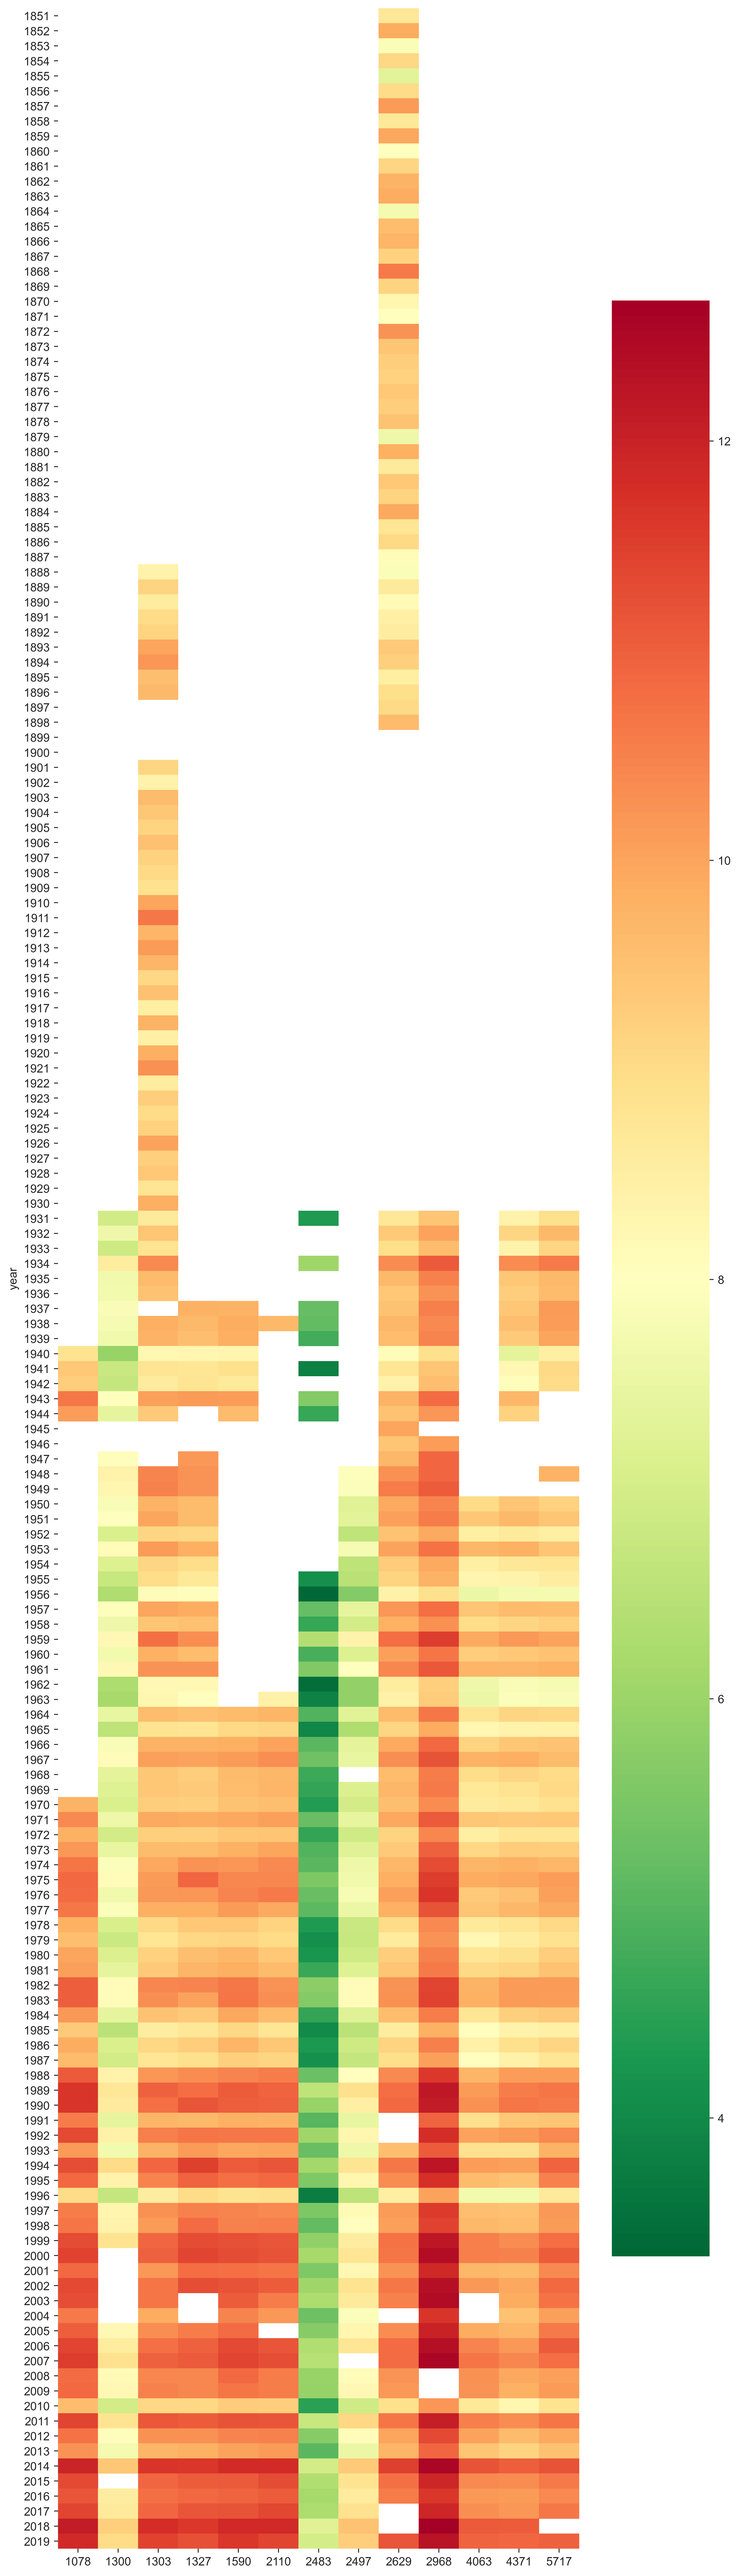

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plot
sns.set_style('ticks')
fig, ax = plt.subplots(dpi = 400, figsize = (10,40))

sns.heatmap(df, cmap='RdYlGn_r', annot=False)
# _r reverses the normal order of the color map 'RdYlGn'

#sns.heatmap(df, cmap='coolwarm', annot=True, vmin = 8, vmax = 12, ax = ax)
ax.set_yticklabels(df.index.strftime('%Y'))
plt.show()
fig.savefig('example1.png')

## Plot only the columns showing 2019 a temperature above a given threshold.

In [23]:
import numpy as np
idx = np.where(df.values[-1]>11.5)
cols = df.columns[idx]
df[cols].tail()

1078   1590   2968
year                           
2015-01-01  11.33  11.10  11.91
2016-01-01  11.16  10.95  11.64
2017-01-01  11.43  11.18  11.92
2018-01-01  12.12  11.86  12.67
2019-01-01  11.84  11.62  12.30

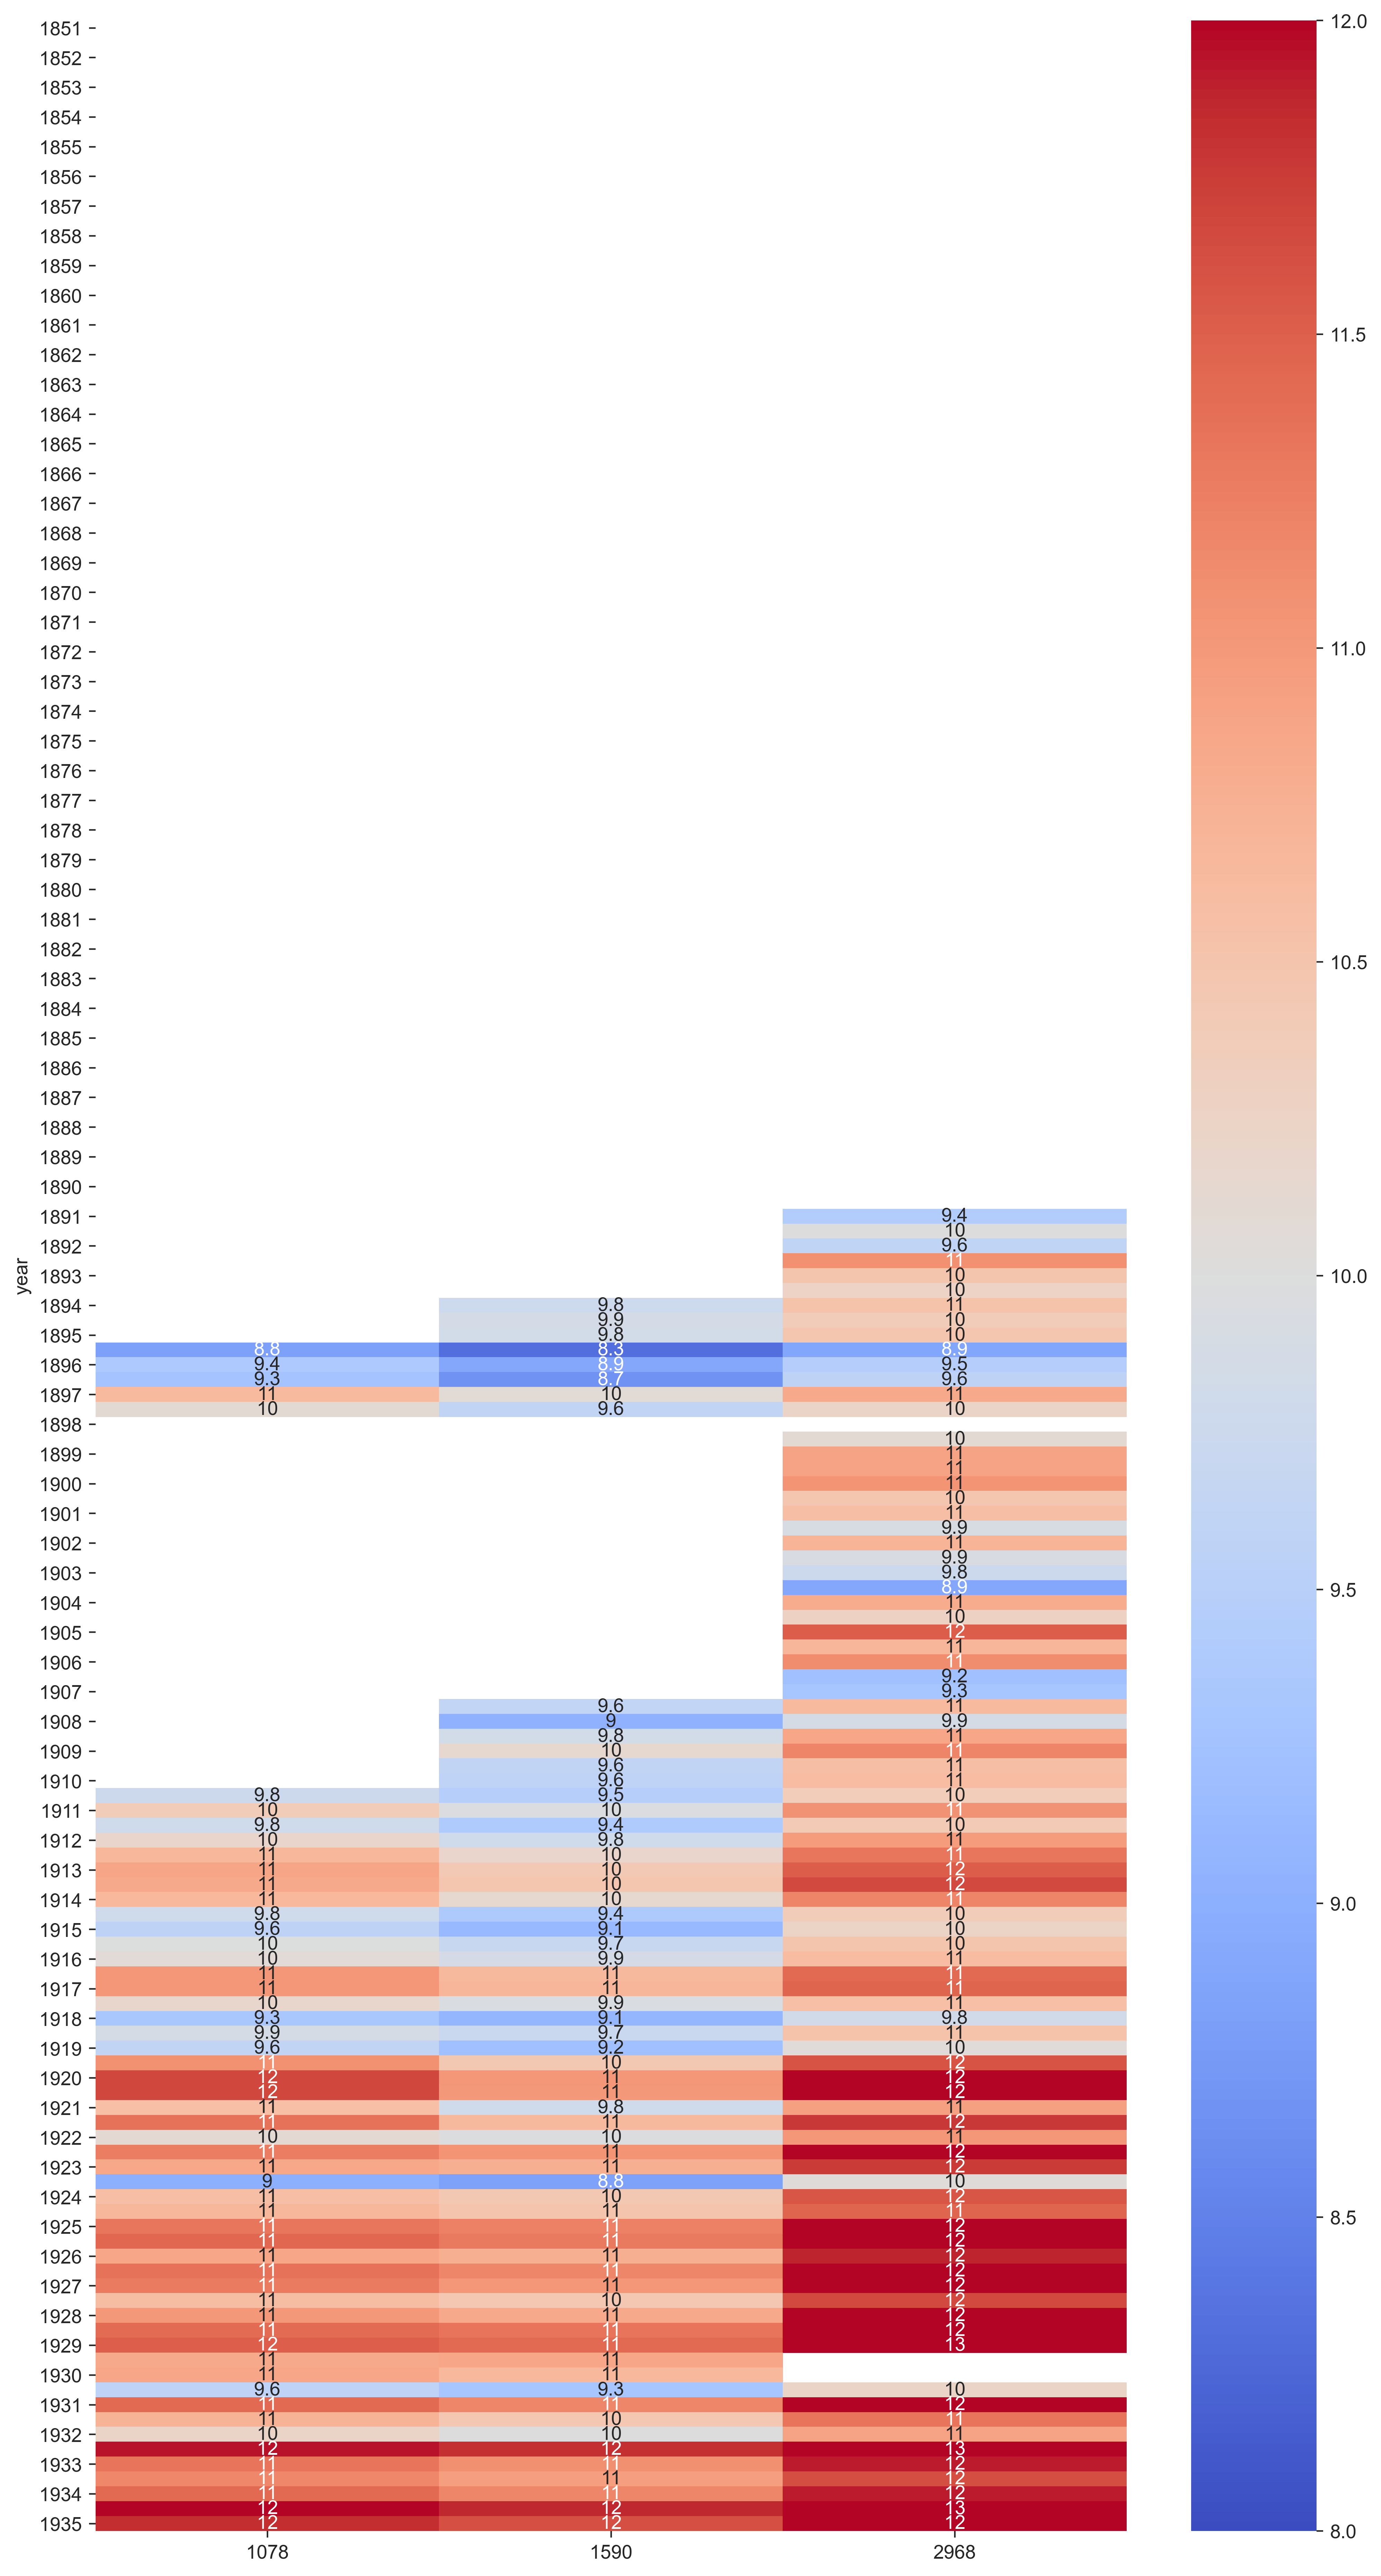

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plot
sns.set_style('ticks')
fig, ax = plt.subplots(dpi = 400, figsize = (12,24))

# the size of A4 paper
#fig.set_size_inches(12, 30)
#sns.violinplot(data=d, inner="points", ax=ax)    
#sns.despine()
#sns.heatmap(df, cmap='RdYlGn_r', annot=False)
# _r reverses the normal order of the color map 'RdYlGn'

sns.heatmap(df[cols], cmap='coolwarm', annot=True, vmin = 8, vmax = 12, ax = ax)
ax.set_yticklabels(df.index.strftime('%Y'))

fig.savefig('example2.png')


More on style:
https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

In [27]:
df.style.background_gradient(cmap='coolwarm')
# HOW TO HANDLE NO DATA (nan)?

## Plot the relative temperature changes

In [28]:
df.tail()

1078  1300   1303   1327   1590   2110  2483  2497   2629   2968  \
year                                                                            
2015-01-01  11.33   NaN  10.92  11.06  11.10  11.30  6.36  8.84  10.75  11.91   
2016-01-01  11.16  8.55  10.77  10.86  10.95  11.05  6.16  8.60  10.59  11.64   
2017-01-01  11.43  8.66  10.92  11.14  11.18  11.39  6.26  8.87    NaN  11.92   
2018-01-01  12.12  9.24  11.79  11.60  11.86  11.85  7.26  9.49    NaN  12.67   
2019-01-01  11.84  9.01  11.44  11.24  11.62  11.42  7.00  9.27  11.17  12.30   

             4063   4371   5717  
year                             
2015-01-01  10.40  10.36  10.62  
2016-01-01  10.17  10.13  10.41  
2017-01-01  10.33  10.22  10.66  
2018-01-01  11.07  11.05    NaN  
2019-01-01  10.95  10.89  10.99

### Reference temperature: Mean temperature between 1960 and 1990

In [29]:
idx = (df.index <= pd.Timestamp('1990')) & (df.index >= pd.Timestamp('1960'))

In [32]:
t_mean = df.loc[idx].mean()
t_mean

1078    10.387143
1300     7.487419
1303     9.568710
1327     9.635484
1590     9.912222
2110     9.807143
2483     4.848065
2497     7.276667
2629     9.628065
2968    10.777419
4063     9.013548
4371     9.241613
5717     9.340000
dtype: float64

In [33]:
df_tdiff = df - t_mean # broadcast operation
df_tdiff.tail()

1078      1300     1303      1327      1590      2110  \
year                                                                    
2015-01-01  0.942857       NaN  1.35129  1.424516  1.187778  1.492857   
2016-01-01  0.772857  1.062581  1.20129  1.224516  1.037778  1.242857   
2017-01-01  1.042857  1.172581  1.35129  1.504516  1.267778  1.582857   
2018-01-01  1.732857  1.752581  2.22129  1.964516  1.947778  2.042857   
2019-01-01  1.452857  1.522581  1.87129  1.604516  1.707778  1.612857   

                2483      2497      2629      2968      4063      4371  5717  
year                                                                          
2015-01-01  1.511935  1.563333  1.121935  1.132581  1.386452  1.118387  1.28  
2016-01-01  1.311935  1.323333  0.961935  0.862581  1.156452  0.888387  1.07  
2017-01-01  1.411935  1.593333       NaN  1.142581  1.316452  0.978387  1.32  
2018-01-01  2.411935  2.213333       NaN  1.892581  2.056452  1.808387   NaN  
2019-01-01  2.151935  1.993333  1.541935  1.522581  1.936452  1.648387  1.65

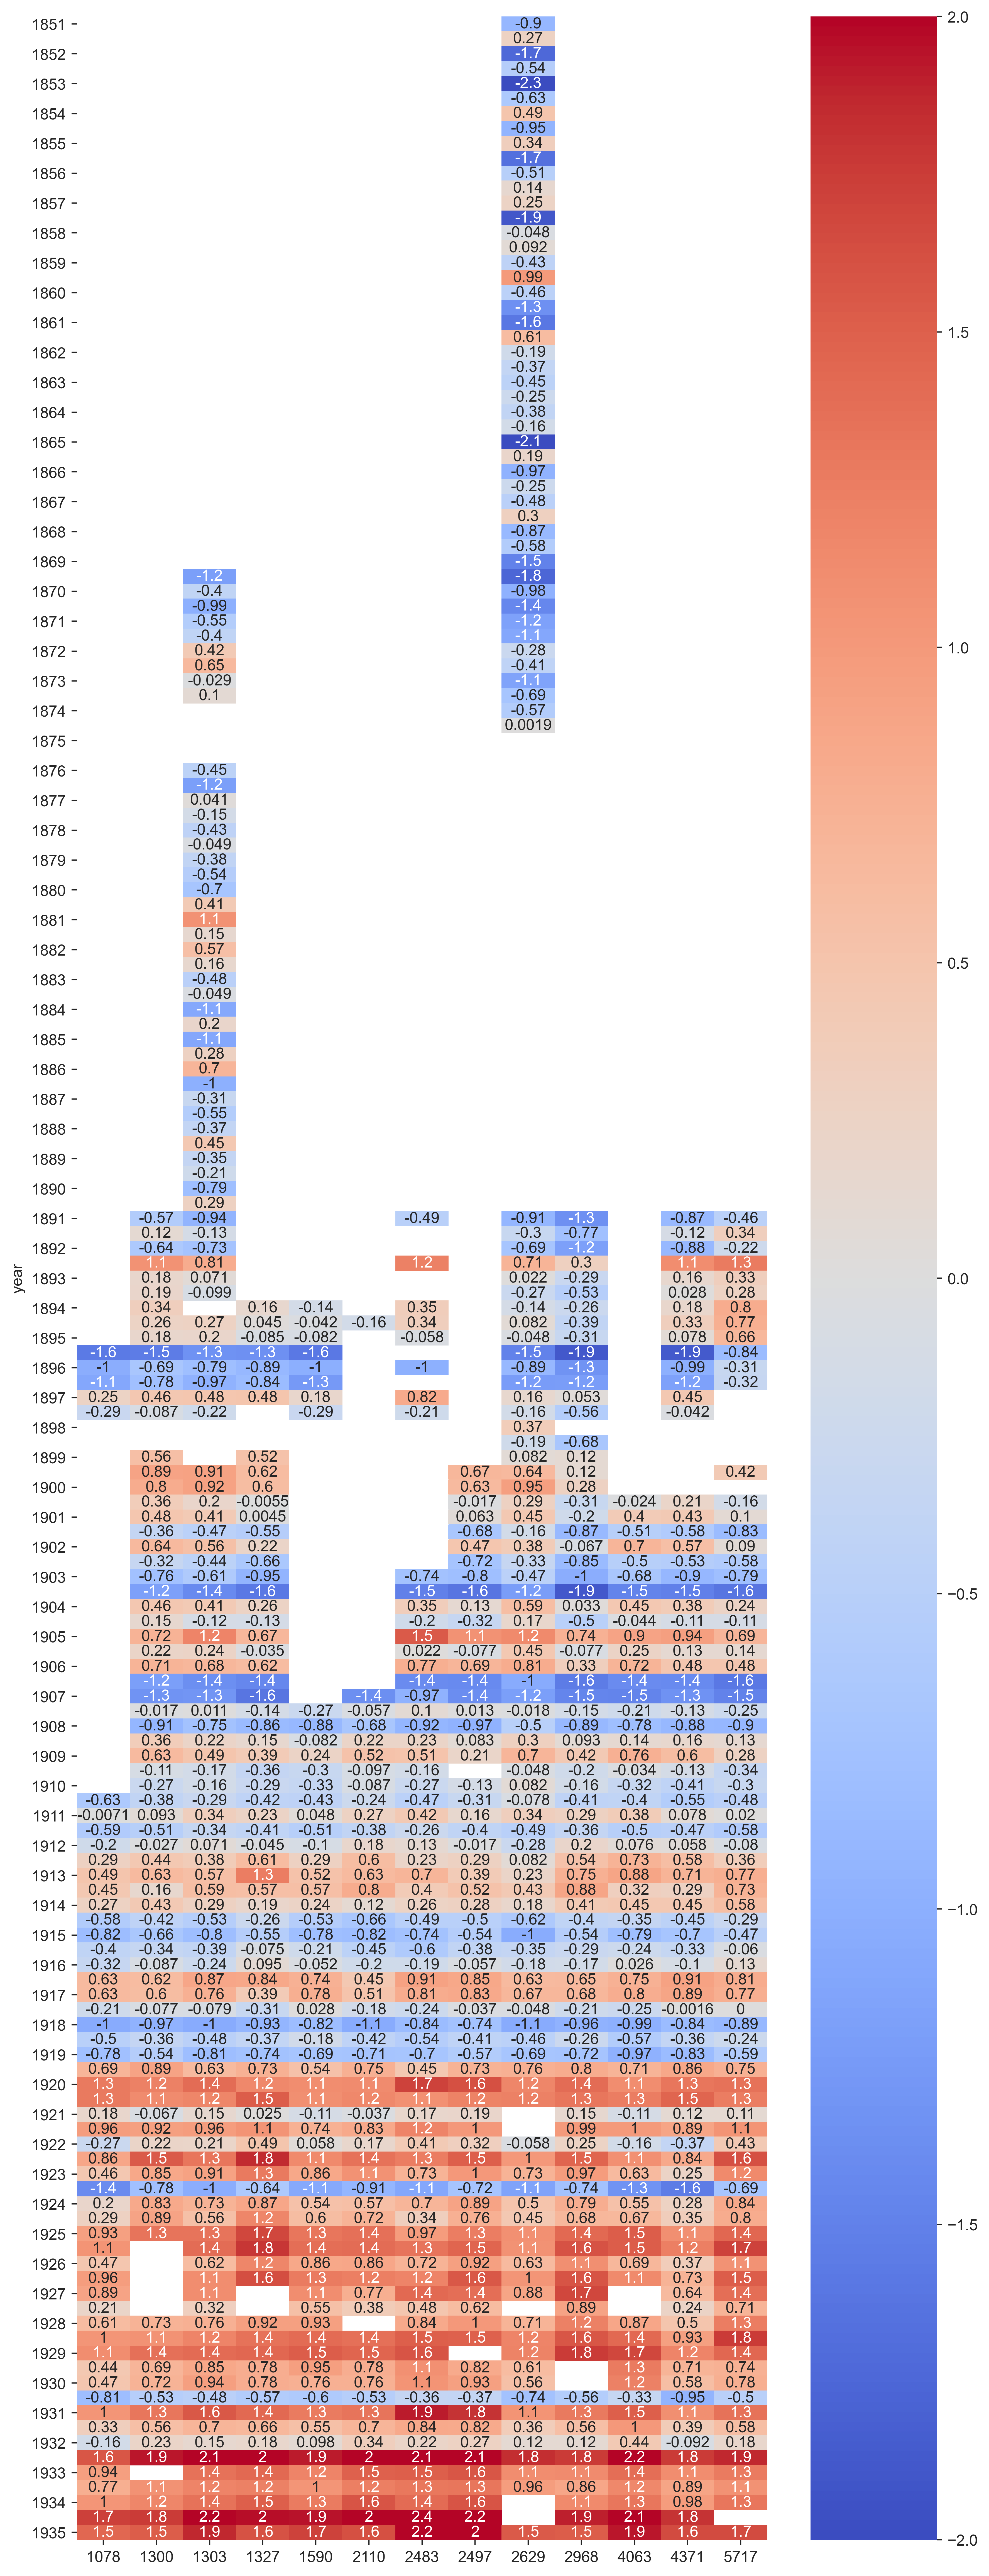

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plot
sns.set_style('ticks')
fig3, ax3 = plt.subplots(dpi = 400, figsize = (10,30))

#sns.heatmap(df_tdiff, cmap='coolwarm', annot=True, vmin = -2, vmax = 2, ax = ax3)
sns.heatmap(df_tdiff, cmap='coolwarm', annot=True, vmin = -2, vmax = 2, ax = ax3)
ax3.set_yticklabels(df.index.strftime('%Y'))

fig3.savefig('example3.png')


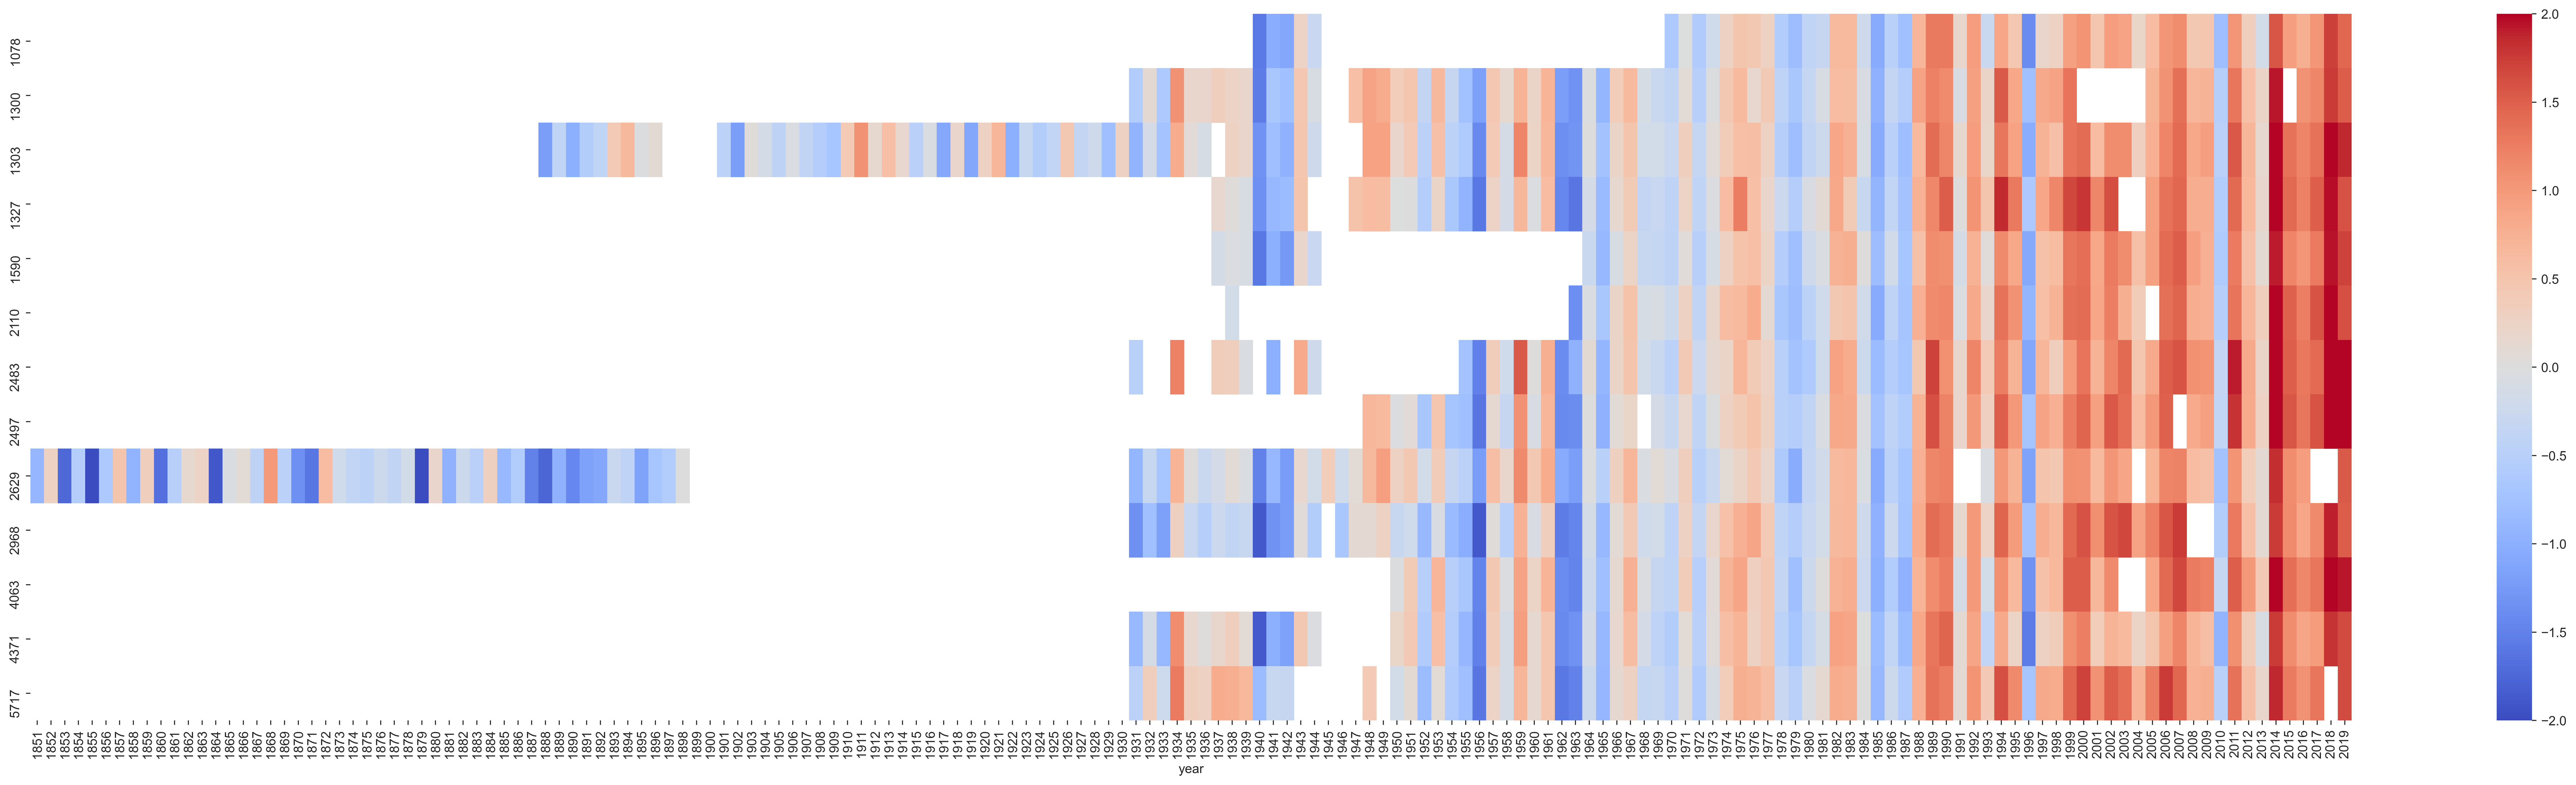

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plot
sns.set_style('ticks')
fig4, ax4 = plt.subplots(dpi = 400, figsize = (40,10))

#sns.heatmap(df_tdiff, cmap='coolwarm', annot=True, vmin = -2, vmax = 2, ax = ax3)
sns.heatmap(df_tdiff.T, cmap='coolwarm', vmin = -2, vmax = 2, ax = ax4)
ax4.set_xticklabels(df.index.strftime('%Y'))

fig4.savefig('example4.png')


## HOMEWORK 1

Create a dataframe with the following structure:

| station_id |  timestamp | temp_diff |  lat | lon |
|-----------:|-----------:|-----------:|-----:|----:|
|          1 | 1980-01-01 |       2.3 | 51.2 | 7.0 |
|          1 | 1981-01-01 |       1.3 | 51.2 | 7.0 |
|          1 | 1982-01-01 |       1.7 | 51.2 | 7.0 |
|        ... |        ... |        ... |  ... | ... |
|         10 | 1980-01-01 |       3.5 | 50.7 | 6.5 |
|         10 | 1981-01-01 |       2.7 | 50.7 | 6.5 |
|         10 | 1982-01-01 |       3.1 | 50.7 | 6.5 |
|        ... |        ... |        ... |  ... | ... |

Save it as a CSV file and import it to QGIS.

## HOMEWORK 2

Build a dataframe with annual temperatures of all stations in NRW which are still active, regardless of the lengths of the temperature time series. Plot the mean annual temperature at these stations for the year 2019 against the altitute of the stations. What do you observe? 